## Decision Tree Model to predict mushroom type (poisonous or edible)

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [18]:
np.random.seed(42)

In [19]:
data = pd.read_csv('homework5_input_data.csv')

In [20]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

### Converts categorical data -> numeric data to use for classification

In [21]:
X_numeric = pd.get_dummies(X, columns=X.columns, prefix=X.columns)
X_numeric.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=1)

### Builds decision tree binary classifier & uses 5 fold cross validation

In [23]:
model = DecisionTreeClassifier(random_state=0)

In [24]:
result = cross_val_score(model, X_train, Y_train, cv=5)
print('Individual cross-validation accuracies')
print(result)
print('Mean cross validation result ')
print(np.mean(result))

Individual cross-validation accuracies
[1.         1.         0.99846154 1.         1.        ]
Mean cross validation result 
0.9996923076923077


### Uses training data to build model & reports results.

In [25]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 1.00


### Confusion matrix of normalized & non-normalized predictions.

Confusion matrix, without normalization
[[820   0]
 [  0 805]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


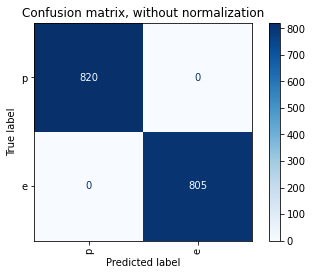

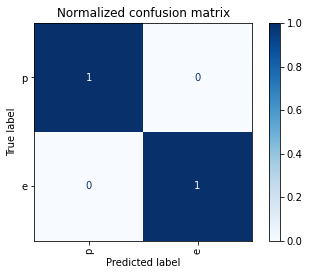

In [26]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['p', 'e'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.tick_params(axis='x', rotation=90)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()